# [Python Reference Link](http://www.data8.org/sp20/python-reference.html)
*Run the cell below so that we can set our modules up*

In [2]:
import numpy as np
from datascience import *
from IPython.display import YouTubeVideo

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Hypothesis Testing: The Popularity of K-Pop

According to a 2019 survey conducted and published on the website [Statista](https://www.statista.com/statistics/956042/south-korea-kpop-popularity-in-the-us/), around 29.4 percent of US respondents stated that K-pop was very popular in their country. A further 30.8 percent reported that it was quite popular. 

For the sake of argument, let's define "popular" to mean that K-Pop is liked by more than 55% of the population. 

Let's use our Math Class Survey to help answer this question:

In [3]:
math211_survey = Table().read_table('Math211_FallSurvey.csv')
math211_survey

Timestamp,Surveyor,GPA,introversion/extroversion,Pets,Handed,Sleep Position,K-Pop,K-Pop Group,travel destination,Birthplace,Transfer destination,Fear,Music Genre,Color
8/17/2023 16:33,Christian Le,2.86,6,Dogs,Right-handed,On my side,Yes,Le Sserafim,Japan,Local,UC,Working,Pop,Red
8/17/2023 16:34,Christian Le,4,8,nan,Right-handed,On my back,Yes,Le Sserafim,Switzerland,Local,UC,A regretful life,All,Black
8/17/2023 16:38,Christian Le,2.5,8,Cats,Right-handed,On my stomach,Yes,Seventeen,Hawaii,Local,UC Transfer,"Death, Spiders","R&B, K-POP",Green
8/17/2023 16:38,Christian Le,3.96,6,Cats,Right-handed,On my side,Yes,STAYC,Costa Rica,Local,UC Grad,Loss of loved ones,"R&B, K-POP",Purple
8/17/2023 16:54,Christian Le,2.98,6,nan,Left-handed,On my side,Yes,New Jeans,Hawaii,Local,nan,Death,R&B,Green
8/17/2023 16:55,Christian Le,3.8,8,Dogs,Right-handed,On my side,Yes,New Jeans,Hawaii,Local,UC,Being alone,R&B,Blue
8/17/2023 17:00,Christian Le,4,3,nan,Right-handed,On my back,No,nan,Japan,California (not Bay Area),CSU,Not being accepted into career program,Hip hop,Khaki
8/17/2023 18:13,Christian Le,4,2,"Cats, Dogs, Reptiles",Both,On my stomach,Yes,New Jeans,Dubai,Local,UC,Insects,Pop,Red
8/17/2023 20:38,Casey So,3.86,3,Dogs,Right-handed,On my back,Yes,Seventeen,Korea,Local,UC,Birds,Pop,Light Blue
8/17/2023 20:43,Casey So,3.2,4,nan,Right-handed,On my side,Yes,Twice,Philippines,Local,UC,Death,Pop,Blue


Let's find the percentage of our survey respondents who 'like' K-Pop:

In [4]:
math211_survey.group('K-Pop').column('count').item(1)

138

In [5]:
sample_size = math211_survey.num_rows
num_kpop_enjoyers = math211_survey.group('K-Pop').column('count').item(1)
prop_kpop_enjoyers = num_kpop_enjoyers/sample_size

prop_kpop_enjoyers

0.5948275862068966

In [6]:
# Defining a test statistic: The sample percentage of K-Pop enjoyers above 55%
observed_statistic = prop_kpop_enjoyers*100 - 55
observed_statistic

4.482758620689658

#### Let's prep for the for-loop by looking at each step
Step 1: Simulate the sample

In [9]:
simulated_sample.item(0)*100 - 55

-1.5517241379310391

In [7]:
simulated_sample = sample_proportions(sample_size,make_array(.55,.45)) #array: (yes_k-pop,no_k-pop)
simulated_sample 

array([ 0.53448276,  0.46551724])

Step 2: Measure the statistic

In [10]:
simulated_statistic = simulated_sample.item(0)*100 - 55
simulated_statistic

-1.5517241379310391

Step 3: Store the statistic

In [ ]:
# use np.append(simulated_statistics , simulated_statistic)

Let's run 10,000 simulations inside the for-loop now:

In [13]:
num_simulations = 10000
simulated_statistics = make_array() #creating the empty array to store all simulated statistics

for i in np.arange(num_simulations):
    #Step 1)
    simulated_sample = sample_proportions(sample_size,make_array(.55,.45))
    #Step 2
    simulated_statistic = simulated_sample.item(0)*100 - 55
    #Step 3
    simulated_statistics = np.append(simulated_statistics , simulated_statistic)

simulated_statistics

array([ 5.34482759,  1.89655172, -5.43103448, ..., -4.13793103,
       -0.25862069,  1.89655172])

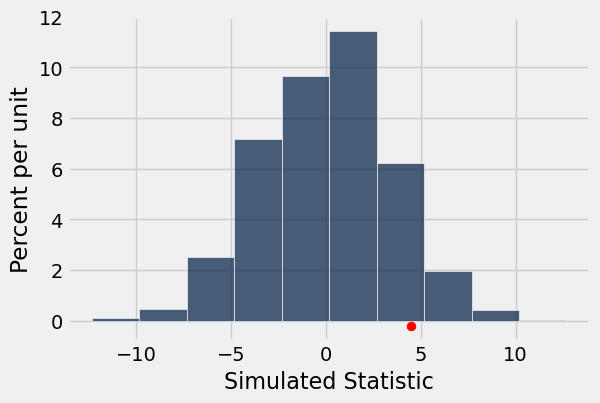

In [14]:
Table().with_columns('Simulated Statistic', simulated_statistics).hist()
plt.scatter(observed_statistic, -0.002, color='red', s=40);

In [15]:
p_value = np.count_nonzero(simulated_statistics >= observed_statistic) / num_simulations 
p_value

0.0992

## Hypothesis Testing: A/B Testing

Let's look at some courses and their current enrollment sizes/statuses:

In [16]:
math_classes = Table().read_table('Math_Class_Enrollment_AB.csv')
math_classes

Professor,Class,Modality,Enrollment,Dropped
A,Discrete,Online,36,8
A,Statistics,Online,46,19
A,Calc 1,Online,48,18
A,Linear Algebra,Online,55,24
B,Statistics,In-Person,40,12
B,Statistics,In-Person,35,11
B,Calc 2,In-Person,32,3


Let's compare somme averages between two subgroups. Note that we can proceed with looking at `Professor A vs. Professor B`, **OR**, `online vs. in-person`

In [ ]:
math_classes.group('Moda')

In [21]:
math_classes.group('Professor',np.average).column('Enrollment average')

array([ 46.25      ,  35.66666667])

Let's defined the `observed_ab_statistic`

In [22]:
#Let's use this cell to build some prep variables 
math_classes_group_average = math_classes.group('Professor',np.average).column('Enrollment average')
math_classes_group_average

array([ 46.25      ,  35.66666667])

In [23]:
observed_ab_statistic = math_classes_group_average.item(0) - math_classes_group_average.item(1)
observed_ab_statistic

10.583333333333336

Let's simulate one iteration of the for-loop

Step1: Simulate the sample 

In [31]:
shuffled_prof = math_classes.sample(math_classes.num_rows, with_replacement=False).column('Professor')
shuffled_classes = math_classes.with_column('Shuffled Prof',shuffled_prof)
shuffled_enroll = shuffled_classes.group('Shuffled Prof',np.average).column('Enrollment average')
shuffled_enroll

array([ 42.75      ,  40.33333333])

Step2: Measure the statistic

In [32]:
simulated_statistic = shuffled_enroll.item(0) - shuffled_enroll.item(1)
simulated_statistic

2.4166666666666643

Step 3: Store the statistic

In [ ]:
#np.append(simulated_statistics , simulated_statistic)

Let's run 10,000 simulations inside the for-loop now:

In [33]:
num_simulations = 10000
simulated_ab_statistics = make_array()

for i in np.arange(num_simulations):
    #Step 1
    shuffled_prof = math_classes.sample(math_classes.num_rows, with_replacement=False).column('Professor')
    shuffled_classes = math_classes.with_column('Shuffled Prof',shuffled_prof)
    shuffled_enroll = shuffled_classes.group('Shuffled Prof',np.average).column('Enrollment average')
    #Step 2
    simulated_statistic = shuffled_enroll.item(0) - shuffled_enroll.item(1)
    #Step 3
    simulated_ab_statistics = np.append(simulated_ab_statistics,simulated_statistic)

simulated_ab_statistics

array([  5.91666667, -13.91666667,   1.25      , ...,  -4.58333333,
         4.75      ,   1.83333333])

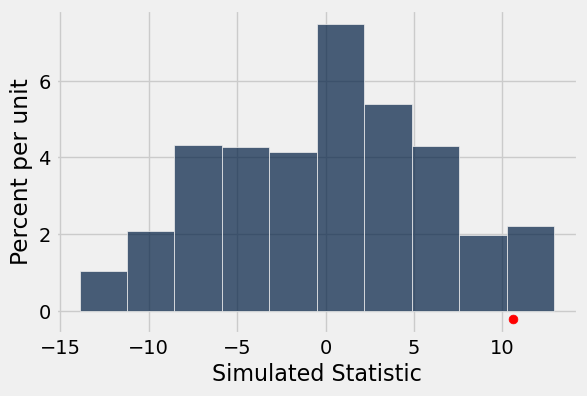

In [34]:
Table().with_columns('Simulated Statistic', simulated_ab_statistics).hist()
plt.scatter(observed_ab_statistic, -0.002, color='red', s=40);

In [35]:
p_value_ab = np.count_nonzero(simulated_ab_statistics >= observed_ab_statistic) / num_simulations 
p_value_ab

0.0598